<a href="https://www.kaggle.com/code/oussamaelkhsoui/spam-classifier-rnn-embadding?scriptVersionId=146979923" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2023-10-17 17:50:59--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   687KB/s    in 0.7s    

2023-10-17 17:51:01 (687 KB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
data = pd.read_csv("/kaggle/input/spam-data/spam.csv", encoding="ISO-8859-1")

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
data.columns = ["target", "msg"]

In [7]:
data.head(2)

,target,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [8]:
data["bi_target"] = data["target"].map({"ham":0, "spam":1})

In [9]:
data

,target,msg,bi_target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    data.msg, data.bi_target, 
    random_state=42, 
    shuffle=True, 
    test_size=0.33)

In [11]:
y_train

3235    0
945     0
5319    0
5528    0
247     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: bi_target, Length: 3733, dtype: int64

In [12]:
MAX_VORAB_SIZE = 20000

tokenizer = Tokenizer(num_words=MAX_VORAB_SIZE)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [13]:
V = len(tokenizer.index_word.values())
V

7259

In [14]:
x_train_pad = pad_sequences(x_train_seq)

In [15]:
N, T = x_train_pad.shape

In [16]:
x_test_pad = pad_sequences(x_test_seq, maxlen=T, truncating="pre")

In [17]:
x_test_pad.shape

(1839, 121)

In [18]:
D = 20
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T,)),
    tf.keras.layers.Embedding(V+1, D),
    tf.keras.layers.LSTM(15, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [19]:
r = model.fit(x_train_pad, 
              y_train.values, 
              epochs=10, 
              validation_data=(x_test_pad, y_test.values))

Epoch 1/10
117/117 [==============================] - 9s 51ms/step - loss: 0.4389 - accuracy: 0.8588 - val_loss: 0.3807 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 5s 47ms/step - loss: 0.3523 - accuracy: 0.8674 - val_loss: 0.3520 - val_accuracy: 0.8630
Epoch 3/10
117/117 [==============================] - 6s 48ms/step - loss: 0.3187 - accuracy: 0.8674 - val_loss: 0.3132 - val_accuracy: 0.8630
Epoch 4/10
117/117 [==============================] - 6s 49ms/step - loss: 0.2746 - accuracy: 0.8677 - val_loss: 0.2732 - val_accuracy: 0.8630
Epoch 5/10
117/117 [==============================] - 6s 48ms/step - loss: 0.2271 - accuracy: 0.8770 - val_loss: 0.2346 - val_accuracy: 0.8717
Epoch 6/10
117/117 [==============================] - 5s 47ms/step - loss: 0.1904 - accuracy: 0.9151 - val_loss: 0.2143 - val_accuracy: 0.8798
Epoch 7/10
117/117 [==============================] - 6s 48ms/step - loss: 0.1661 - accuracy: 0.9413 - val_loss: 0.1892 - val_accuracy: 0.9190

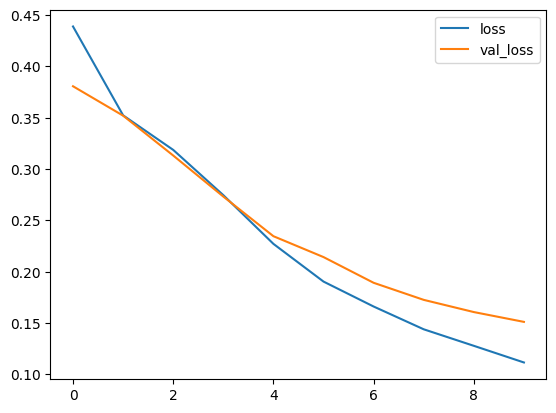

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

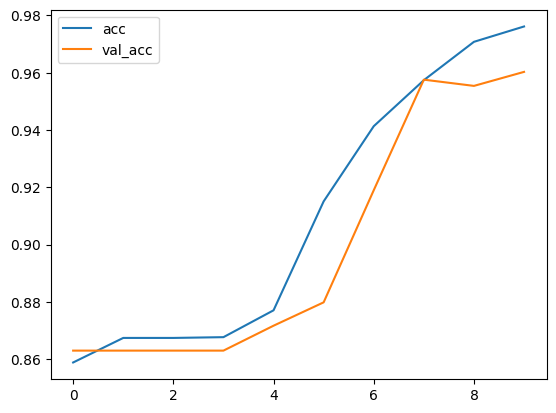

In [21]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()